In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("solar_data_copy_10%.csv")
data.head(5)

,Timestamp,Air_Temp,Relative_Humidity,RTD,Solar_Radiation,Array_Voltage,Array_Current,Power_Generated
0,27-04-2022 15:32,43.349172,12.790256,93.810658,707.53384,80.178232,5.364869,430.14572
1,27-04-2022 15:34,43.433980,11.468986,93.926163,710.46328,80.266728,5.366041,430.71452
2,27-04-2022 15:36,43.286580,11.047298,93.409872,695.51016,80.187416,5.365501,430.24568
3,27-04-2022 15:38,43.523020,12.058292,96.768182,696.24472,80.727760,5.364512,433.06504
4,27-04-2022 15:40,43.728656,10.722330,96.870179,674.05752,80.500312,5.365144,431.89576


In [ ]:
waste_1 = data.pop('Timestamp')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air_Temp           1009 non-null   float64
 1   Relative_Humidity  1009 non-null   float64
 2   RTD                1009 non-null   float64
 3   Solar_Radiation    1009 non-null   float64
 4   Array_Voltage      1009 non-null   float64
 5   Array_Current      1009 non-null   float64
 6   Power_Generated    1009 non-null   float64
dtypes: float64(7)
memory usage: 55.3 KB


In [ ]:
min_d = data['Power_Generated'].min()
max_d=data['Power_Generated'].max()

In [ ]:
data["Power_Generated"].describe()

count    1009.000000
mean      183.151609
std       166.299019
min         8.485232
25%        14.354230
50%       276.001580
75%       341.081680
max       438.556840
Name: Power_Generated, dtype: float64

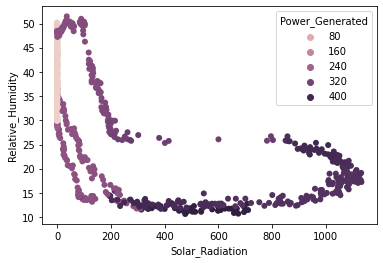

In [ ]:
sns.scatterplot(x="Solar_Radiation", y="Relative_Humidity",
                hue="Power_Generated",
                sizes=(3, 15), linewidth=0,
                data=data)

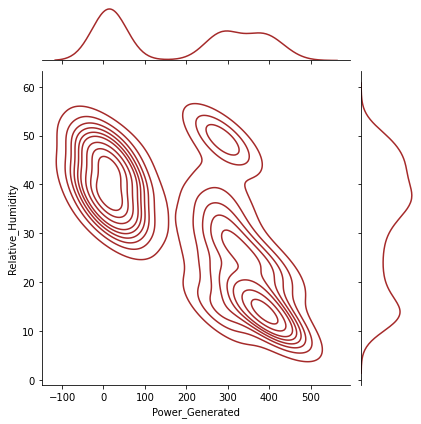

In [ ]:
sns.jointplot(x='Power_Generated',y='Relative_Humidity',data = data, kind = 'kde' ,color = 'brown')

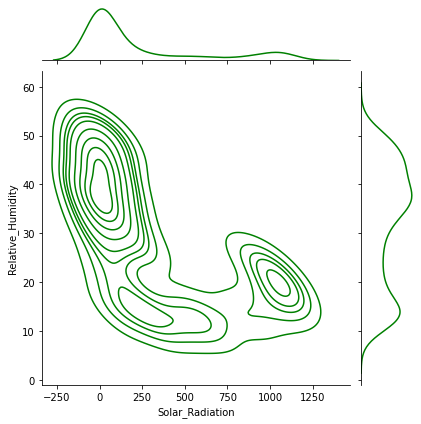

In [ ]:
sns.jointplot(x='Solar_Radiation',y='Relative_Humidity',data = data, kind = 'kde' ,color = 'green')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air_Temp           1009 non-null   float64
 1   Relative_Humidity  1009 non-null   float64
 2   RTD                1009 non-null   float64
 3   Solar_Radiation    1009 non-null   float64
 4   Array_Voltage      1009 non-null   float64
 5   Array_Current      1009 non-null   float64
 6   Power_Generated    1009 non-null   float64
dtypes: float64(7)
memory usage: 55.3 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
names = ["Air_Temp","Relative_Humidity","Solar_Radiation","RTD","Array_Voltage","Array_Current","Power_Generated"]
data[names] = scaler.fit_transform(data[names])

In [ ]:
data.head(10)

,Air_Temp,Relative_Humidity,RTD,Solar_Radiation,Array_Voltage,Array_Current,Power_Generated
0,0.832721,0.052450,0.799167,0.624959,0.980042,0.242983,0.980443
1,0.834979,0.020098,0.800428,0.627547,0.981145,0.263961,0.981765
2,0.831054,0.009773,0.794791,0.614339,0.980157,0.254296,0.980675
3,0.837350,0.034527,0.831457,0.614987,0.986894,0.236593,0.987230
4,0.842825,0.001816,0.832571,0.595390,0.984058,0.247906,0.984512
5,0.841679,0.027132,0.833148,0.590691,0.982769,0.223706,0.982969
6,0.836313,0.005162,0.831340,0.581154,0.985388,0.204375,0.985387
7,0.852264,0.026458,0.886563,0.583096,1.000000,0.204375,1.000000
8,0.850035,0.027018,0.880728,0.573551,0.997385,0.202728,0.997368
9,0.845681,0.027189,0.875779,0.564169,0.996492,0.196284,0.996406


In [ ]:
Y = data.pop("Power_Generated")
X = data 

In [ ]:
X.shape

(1009, 6)

In [ ]:
Y.shape

(1009,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
%%time
import tensorflow as tf
import random

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(300,activation='relu'),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(200,activation='relu'),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(100,activation='relu'),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss='mae',
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['mae'])

history_1 = model_1.fit(X_train,Y_train,epochs=25)

Epoch 1/25
26/26 [==============================] - 1s 5ms/step - loss: 0.1362 - mae: 0.1362
Epoch 2/25
26/26 [==============================] - 0s 3ms/step - loss: 0.0682 - mae: 0.0682
Epoch 3/25
26/26 [==============================] - 0s 3ms/step - loss: 0.0548 - mae: 0.0548
Epoch 4/25
26/26 [==============================] - 0s 3ms/step - loss: 0.0570 - mae: 0.0570
Epoch 5/25
26/26 [==============================] - 0s 4ms/step - loss: 0.0596 - mae: 0.0596
Epoch 6/25
26/26 [==============================] - 0s 3ms/step - loss: 0.0497 - mae: 0.0497
Epoch 7/25
26/26 [==============================] - 0s 3ms/step - loss: 0.0483 - mae: 0.0483
Epoch 8/25
26/26 [==============================] - 0s 4ms/step - loss: 0.0484 - mae: 0.0484
Epoch 9/25
26/26 [==============================] - 0s 3ms/step - loss: 0.0462 - mae: 0.0462
Epoch 10/25
26/26 [==============================] - 0s 3ms/step - loss: 0.0440 - mae: 0.0440
Epoch 11/25
26/26 [==============================] - 0s 4ms/step - lo

Text(0, 0.5, 'Mean Absoulte Error')

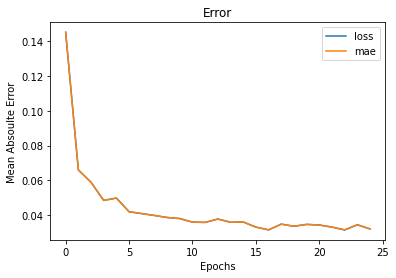

In [ ]:
pd.DataFrame(history_1.history).plot()
plt.title("Error")
plt.xlabel("Epochs")
plt.ylabel("Mean Absoulte Error")

In [ ]:
%%time
model_1.evaluate(X_test,Y_test)

7/7 [==============================] - 1s 6ms/step - loss: 0.0233 - mae: 0.0233
CPU times: user 310 ms, sys: 6.51 ms, total: 316 ms
Wall time: 882 ms


[0.023346345871686935, 0.023346345871686935]

In [ ]:
pred = model_1.predict(X_test)

In [ ]:
# pred

In [ ]:
pred

array([[0.66559863],
       [0.6249178 ],
       [0.7569156 ],
       [0.01437783],
       [0.62156206],
       [0.7875144 ],
       [0.62768215],
       [0.01422215],
       [0.66878194],
       [0.6482784 ],
       [0.01004711],
       [0.63707304],
       [0.7709402 ],
       [0.7645196 ],
       [0.01124988],
       [0.7741185 ],
       [0.01455358],
       [0.82639384],
       [0.830678  ],
       [0.62347794],
       [0.01456099],
       [0.91933   ],
       [0.6222529 ],
       [0.83014154],
       [0.01453599],
       [0.01458728],
       [0.0129184 ],
       [0.0145826 ],
       [0.0417212 ],
       [0.66609526],
       [0.00660965],
       [0.0145461 ],
       [0.00631749],
       [0.6471729 ],
       [0.61908096],
       [0.0145381 ],
       [0.01201358],
       [0.0145468 ],
       [0.69882077],
       [0.666087  ],
       [0.8342541 ],
       [0.726715  ],
       [0.6162084 ],
       [0.01450075],
       [0.8419743 ],
       [0.6296806 ],
       [0.01421182],
       [0.014

In [ ]:
final_power = pred * (max_d - min_d) + min_d

In [ ]:
final_power

array([[294.7403   ],
       [277.24463  ],
       [334.01315  ],
       [ 14.668728 ],
       [275.80142  ],
       [347.1728   ],
       [278.4335   ],
       [ 14.601774 ],
       [296.10934  ],
       [287.29135  ],
       [ 12.806209 ],
       [282.47226  ],
       [340.0447   ],
       [337.2834   ],
       [ 13.323484 ],
       [341.4116   ],
       [ 14.744313 ],
       [363.89374  ],
       [365.73624  ],
       [276.62537  ],
       [ 14.747499 ],
       [403.86295  ],
       [276.0985   ],
       [365.50552  ],
       [ 14.73675  ],
       [ 14.758805 ],
       [ 14.041071 ],
       [ 14.756796 ],
       [ 26.428333 ],
       [294.9539   ],
       [ 11.327856 ],
       [ 14.741098 ],
       [ 11.202204 ],
       [286.81592  ],
       [274.73438  ],
       [ 14.737658 ],
       [ 13.651932 ],
       [ 14.741399 ],
       [309.0282   ],
       [294.95032  ],
       [367.2742   ],
       [321.02472  ],
       [273.49896  ],
       [ 14.721594 ],
       [370.59445  ],
       [27

In [ ]:
model_1.save("NeuralN_try6.h5")